# Task 3
G = ({1, 2, 3, 4, 5, 6, 7, 8, 9}, {1 → 2, 2 → 1, 2 → 2, 2 → 6, 2 → 3, 3 → 4, 4 → 5, 5 →
6, 6 → 1, 6 → 6, 6 → 7, 5 → 8, 7 → 9, 8 → 9}). Find PageRank value for each vertex
representing a web-site. Beware that there are some some dead-ends. Assume taxation
parameters β = 0 and 0.1

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
G = {
    1: [2],
    2: [1, 2, 6, 3],
    3: [4],
    4: [5],
    5: [6, 8],
    6: [1, 6, 7],
    7: [9],
    8: [9],
    9: []
}

In [3]:
G_nx = nx.DiGraph()
for node, directions in G.items():
    if len(directions) != 0:
        if len(directions) == 3:
            direction_probability = 0.33
        else:
            direction_probability = 1 / len(directions)
    for direction in directions:
        G_nx.add_edge(node, direction, probability=direction_probability)

{(1, 2): Text(0.5586946730614715, 0.6446201893583395, '1.0'),
 (2, 1): Text(0.5586946730614715, 0.6446201893583395, '0.25'),
 (2, 2): Text(0.3067907936811173, 0.7169608389761717, '0.25'),
 (2, 6): Text(0.3533193320116429, 0.3634901119091225, '0.25'),
 (2, 3): Text(-0.042768426566538315, 0.8310948566546408, '0.25'),
 (6, 1): Text(0.6052232113919972, 0.29114946229129035, '0.33'),
 (6, 6): Text(0.39984787034216857, 0.010019384842073365, '0.33'),
 (6, 7): Text(0.42363596355125643, -0.2881991405704588, '0.33'),
 (3, 4): Text(-0.5675497752489697, 0.6422373164672416, '1.0'),
 (4, 5): Text(-0.5407592624221591, 0.06380617698030439, '1.0'),
 (5, 6): Text(0.030550624590797826, -0.10080700989934566, '0.5'),
 (5, 8): Text(-0.43038914097498915, -0.4986583652551225, '0.5'),
 (8, 9): Text(-0.24540755078347196, -0.8928416629347402, '1.0'),
 (7, 9): Text(0.2393203079914029, -0.7932088329914955, '1.0')}

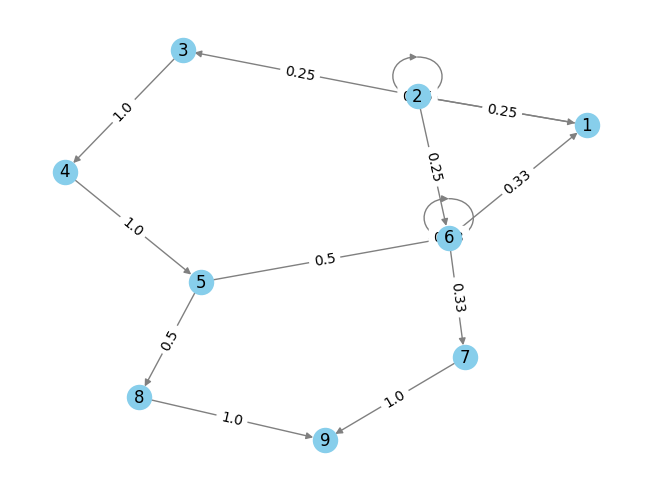

In [4]:
figure, axes = plt.subplots(1, 1, layout='constrained')

layout = nx.kamada_kawai_layout(G_nx)
edges = nx.get_edge_attributes(G_nx, 'probability')
nx.draw(G_nx, layout, with_labels=True, node_color='skyblue', edge_color='gray', ax=axes)
nx.draw_networkx_edge_labels(G_nx, layout, edge_labels=edges, ax=axes)

In [5]:
taxation_parameters = [0, 0.1]
pagerank_parameters = []

In [6]:
for tax in taxation_parameters:
    pagerank_parameters.append(nx.pagerank(G_nx, alpha=(1 - tax)))

In [7]:
pagerank_parameters[0]

{1: 0.11805533919370942,
 2: 0.18055582305273862,
 6: 0.1666665794123611,
 3: 0.06250021877846657,
 4: 0.07986172391477067,
 5: 0.09722303389316596,
 8: 0.06597234094789112,
 7: 0.07291622114448229,
 9: 0.15624871966241394}

In [8]:
pagerank_parameters[1]

{1: 0.11208901022837499,
 2: 0.16531049357033276,
 6: 0.1588604949488652,
 3: 0.0644305841019732,
 4: 0.0852229375445221,
 5: 0.10393638711460346,
 8: 0.0740074197735151,
 7: 0.07489436117942663,
 9: 0.16124831153838634}